In [24]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sample_answer = pd.read_csv('widsdatathon2022/sample_solution.csv')
train_df = pd.read_csv('widsdatathon2022/train.csv')
test_df = pd.read_csv('widsdatathon2022/test.csv')

# Exploring data

In [7]:
# See form answer should be in
sample_answer.head()

,id,site_eui
0,75757,0.0
1,75758,0.0
2,75759,0.0
3,75760,0.0
4,75761,0.0


In [4]:
# Show train data
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [5]:
# Show test data
test_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [11]:
# Looks a shapes of train and test data
train_df.shape, test_df.shape

((75757, 64), (9705, 63))

In [19]:
# Check for missing values
train_df.isna().sum(), test_df.isna().sum()

(Year_Factor                      0
 State_Factor                     0
 building_class                   0
 facility_type                    0
 floor_area                       0
                              ...  
 direction_peak_wind_speed    41811
 max_wind_speed               41082
 days_with_fog                45796
 site_eui                         0
 id                               0
 Length: 64, dtype: int64,
 Year_Factor                     0
 State_Factor                    0
 building_class                  0
 facility_type                   0
 floor_area                      0
                              ... 
 direction_max_wind_speed     8575
 direction_peak_wind_speed    8575
 max_wind_speed               8575
 days_with_fog                9117
 id                              0
 Length: 63, dtype: int64)

In [20]:
# Get info on columns in train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [14]:
# Describing train
train_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [21]:
# Get info on test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [22]:
# Describe test data
test_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
count,9705.0,9.705000e+03,9613.000000,7451.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,...,9705.000000,9705.000000,9705.000000,9705.000000,9705.0,1130.000000,1130.000000,1130.000000,588.000000,9705.000000
mean,7.0,1.632143e+05,1963.219598,64.712924,205.231190,13.520762,36.678081,60.008449,21.705100,41.634886,...,1.323029,66.820093,11.941267,0.211643,0.0,321.743363,310.194690,18.131327,150.755102,80609.000000
std,0.0,2.624759e+05,40.819953,27.935984,264.822814,12.458365,6.968520,5.874699,9.774624,5.528689,...,2.205729,30.936872,13.077936,0.615250,0.0,19.127690,38.969875,1.993348,58.760576,2801.736515
min,7.0,5.982000e+03,0.000000,1.000000,1.800000,-1.000000,27.548387,42.000000,9.000000,33.428571,...,0.000000,15.000000,1.000000,0.000000,0.0,280.000000,240.000000,14.800000,34.000000,75757.000000
25%,7.0,4.802000e+04,1929.000000,45.000000,26.500000,-1.000000,27.548387,54.000000,9.000000,36.053571,...,0.000000,39.000000,3.000000,0.000000,0.0,310.000000,270.000000,16.500000,129.000000,78183.000000
50%,7.0,8.248600e+04,1969.000000,72.000000,118.900000,15.000000,38.661290,59.000000,22.000000,41.625000,...,0.000000,77.000000,5.000000,0.000000,0.0,330.000000,320.000000,18.300000,129.000000,80609.000000
75%,7.0,1.775200e+05,1994.000000,88.000000,231.300000,21.000000,41.177419,64.000000,28.000000,45.685185,...,5.000000,79.000000,12.000000,0.000000,0.0,340.000000,340.000000,19.200000,138.000000,83035.000000
max,7.0,6.353396e+06,2016.000000,100.000000,812.000000,38.000000,50.596774,71.000000,40.000000,54.482143,...,5.000000,122.000000,41.000000,2.000000,0.0,360.000000,350.000000,23.300000,250.000000,85461.000000


In [45]:
# Check for duplicates
train_df.duplicated().sum()

0

<BarContainer object of 100 artists>

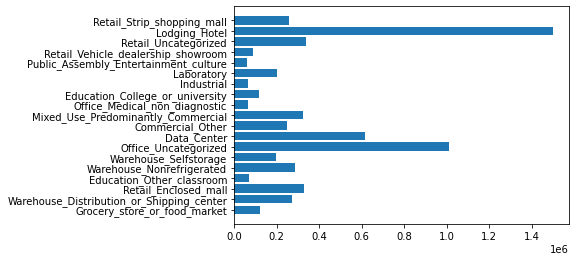

In [49]:
# Bar chart with first 100 building types and floor space
plt.barh(train_df['facility_type'][:100], width= train_df['floor_area'][:100], )